In [3]:
%load_ext nb_black
import nltk
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('/Users/vikaspandey/projects/deeplearning_ai')
import numpy as np
from algorithms.text.preprocessing import TextPreprocessor
from nltk.corpus import twitter_samples 
nltk.download('twitter_samples')

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/vikaspandey/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

<IPython.core.display.Javascript object>

In [4]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

<IPython.core.display.Javascript object>

In [5]:
all_tweets = positive_tweets + negative_tweets
labels = np.append(np.ones(len(positive_tweets)), np.zeros(len(negative_tweets)))

<IPython.core.display.Javascript object>

In [6]:
text_preprocessor = TextPreprocessor(all_tweets)

<IPython.core.display.Javascript object>

In [13]:
text_preprocessor.build_freqs(labels)

<IPython.core.display.Javascript object>

In [14]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

<IPython.core.display.Javascript object>

In [11]:
final_values = []
pos = 0
neg = 0
for word in keys:
    if (word, 0) in text_preprocessor.freqs:
        neg = text_preprocessor.freqs[(word, 0)]
    if (word, 1) in text_preprocessor.freqs:
        pos = text_preprocessor.freqs[(word, 1)]
    final_values.append([word, pos, neg])

<IPython.core.display.Javascript object>

In [12]:
final_values

[['happi', 0, 0],
 ['merri', 0, 0],
 ['nice', 0, 0],
 ['good', 0, 0],
 ['bad', 0, 0],
 ['sad', 0, 0],
 ['mad', 0, 0],
 ['best', 0, 0],
 ['pretti', 0, 0],
 ['❤', 0, 0],
 [':)', 0, 0],
 [':(', 0, 0],
 ['😒', 0, 0],
 ['😬', 0, 0],
 ['😄', 0, 0],
 ['😍', 0, 0],
 ['♛', 0, 0],
 ['song', 0, 0],
 ['idea', 0, 0],
 ['power', 0, 0],
 ['play', 0, 0],
 ['magnific', 0, 0]]

<IPython.core.display.Javascript object>

In [15]:
features = []
sentiments = np.squeeze(labels).tolist()
for sentiment, words in zip(sentiments, text_preprocessor.processed_text):
    positive = 0
    negative = 0
    for word in words:
        positive += text_preprocessor.freqs.get((word, 1), 0)
        negative += text_preprocessor.freqs.get((word, 0), 0)
    features.append({'bias': 1, 'positive': positive, 'negative': negative, 'sentiment': sentiment})

<IPython.core.display.Javascript object>

In [16]:
features = pd.DataFrame(features)

<IPython.core.display.Javascript object>

In [17]:
X = features[['bias', 'positive', 'negative']].values
Y = features['sentiment'].values

<IPython.core.display.Javascript object>

In [18]:
X

array([[  1, 198,  69],
       [  1, 895, 503],
       [  1, 192, 157],
       ...,
       [  1, 453, 522],
       [  1, 338, 194],
       [  1, 116,  91]])

<IPython.core.display.Javascript object>

In [22]:
theta = [7e-08, 0.0005239, -0.00055517]

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Negative')

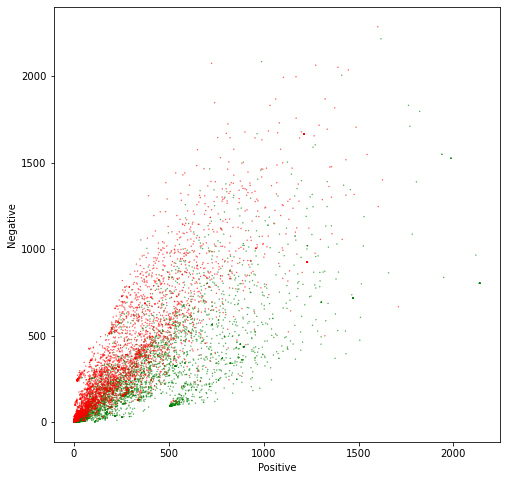

<IPython.core.display.Javascript object>

In [38]:
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

In [20]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

<IPython.core.display.Javascript object>

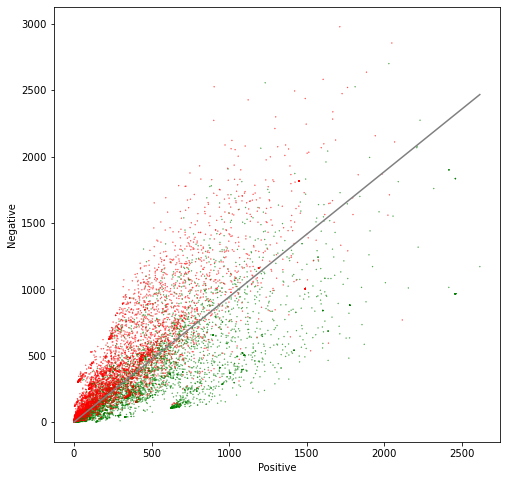

<IPython.core.display.Javascript object>

In [23]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()